# 1. What is the shape of the dataset (rows, columns)?

In [ ]:
import pandas as pd
df = pd.read_csv('/content/tweets_v8.csv')
print(df.shape)

(80019, 12)


# 2. What are the column names in the dataset?

In [ ]:
print(df.columns)

Index(['text', 'Positive', 'Negative', 'Neutral', 'tweet_length'], dtype='object')


# 3. What is the datatype of each column in the dataset?

In [ ]:
print(df.dtypes)

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
source              object
is_retweet            bool
dtype: object


# 4. Are there any missing values in the dataset?

In [ ]:
print(df.isnull().sum())

user_name               4
user_location       23870
user_description     5211
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
source                  0
is_retweet              0
dtype: int64


# 5. What is the 'is_retweet' of (true or false)  ratings ?


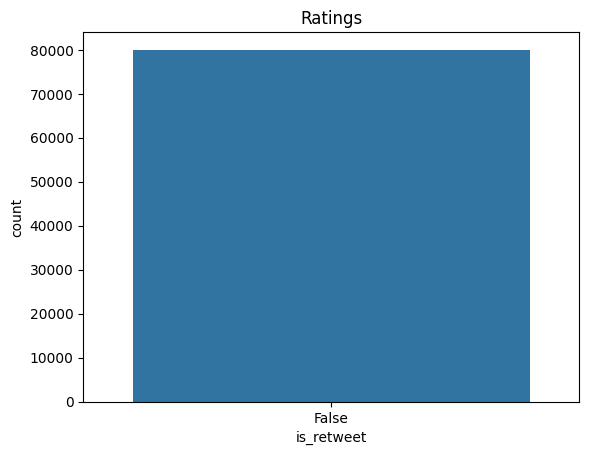

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='is_retweet', data=df)
plt.title("Ratings")
plt.show()

#  6 What are the unique values in the source column ?

In [ ]:
print(df['source'].unique())

['Twitter for Android' 'Twitter Web App' 'Twitter for iPhone' 'Buffer'
 'Twitter for iPad' 'PromoRepublic' 'TweetDeck' 'Instagram'
 'Sprout Social' 'Hootsuite Inc.' 'Tweetbot for iΟS' 'dlvr.it'
 'Meltwater Social' 'Twitter for Mac' 'SocialHub by maloon' 'Sprinklr'
 'Emplifi' 'Agorapulse app' 'Zoho Social' 'SocialFlow' 'Echobox'
 'Blog2Social APP' 'Twitter for Advertisers' 'IFTTT' 'Metricool'
 'Twitter Media Studio' 'Libsyn On-Publish' 'tweetpancake'
 'Microsoft Power Platform' 'Echofon' 'Oops Bot' 'WordPress.com'
 'Twitterrific for iOS' 'LaterMedia' 'BizToc' 'Streamlabs Twitter'
 'Podbean Podcast' 'Flamingo for Android' 'CoSchedule' 'Hypefury'
 'Twitter for  iPhone' 'SmarterQueue' 'Nintendo Switch Share' 'Tweetlogix'
 'TweetCaster for Android' 'TwitPane for Android' 'Vero - True Social'
 'TheWrap' 'Periscope' 'popsugar.com' 'Fenix 2' 'Loomly' 'Spreaker'
 'Sprinklr Publishing' 'PlayStation®Network' 'Sendible' "lucy's microwave"
 'iHeartMedia Publishing' 'www.keengamer.com' 'LinkedIn' 'S

# 7 What is the distribution of user_verified in the dataset (positive, negative, neutral)?

user_verified
False    76718
True      3301
Name: count, dtype: int64


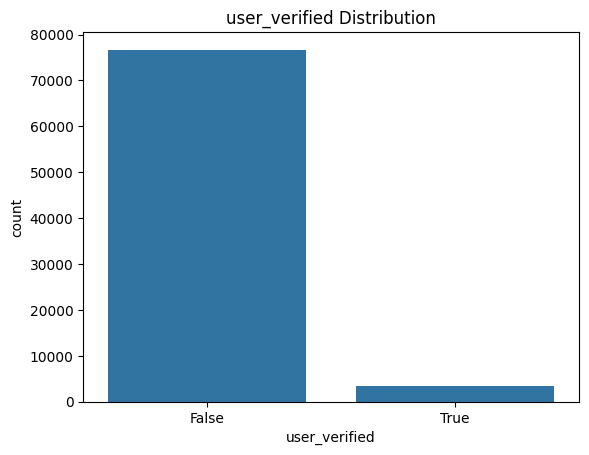

In [ ]:
print(df['user_verified'].value_counts())
sns.countplot(x='user_verified', data=df)
plt.title("user_verified Distribution")
plt.show()

# How can you clean the text data in the review_text column?

In [ ]:
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()
df['cleaned_review'] = df['text'].apply(clean_text)

# What are the most common words in the review_text column?

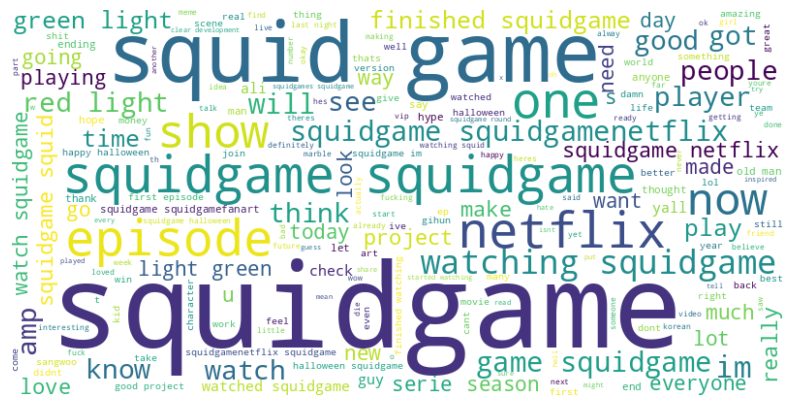

In [ ]:
from wordcloud import WordCloud

text = ' '.join(df['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


#Now let’s move to the task of Squid Game sentiment analysis. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column:

In [ ]:

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text"]]
df = df[["text", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                                text  Positive  Negative  \
0  When life hits and the same time poverty strik...     0.103     0.250   
1  That marble episode of #SquidGame  ruined me. 😭😭😭     0.000     0.307   
2                                    #Squidgame time     0.000     0.000   
3  //Blood on 1st slide\nI'm joining the squidgam...     0.000     0.202   
4  The two first games, players were killed by th...     0.000     0.373   

   Neutral  
0    0.647  
1    0.693  
2    1.000  
3    0.798  
4    0.627  


# Now let’s calculate how most people think about the Squid Game:

In [ ]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive")
    elif (b>a) and (b>c):
        print("Negative")
    else:
        print("Neutral")
sentiment_score(x, y, z)

Neutral


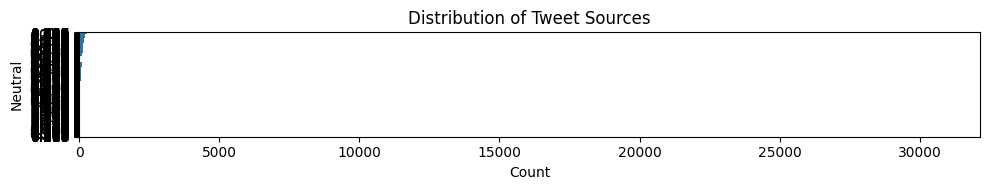

In [ ]:
# Bar chart showing the frequency of each unique tweet source.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.countplot(y='Neutral', data=df, order=df['Neutral'].value_counts().index)
plt.title('Distribution of Tweet Sources')
plt.xlabel('Count')
plt.ylabel('Neutral')
plt.tight_layout()
plt.show()


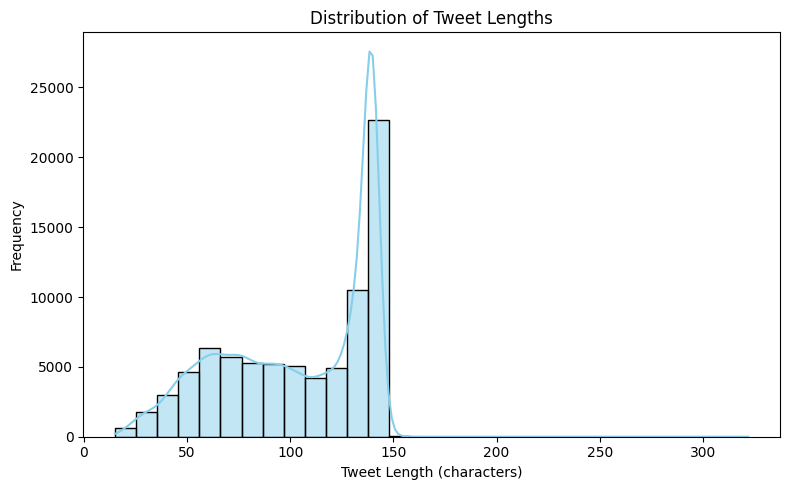

In [ ]:
# Histogram of character counts for tweets (before or after cleaning).
df['tweet_length'] = df['text'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


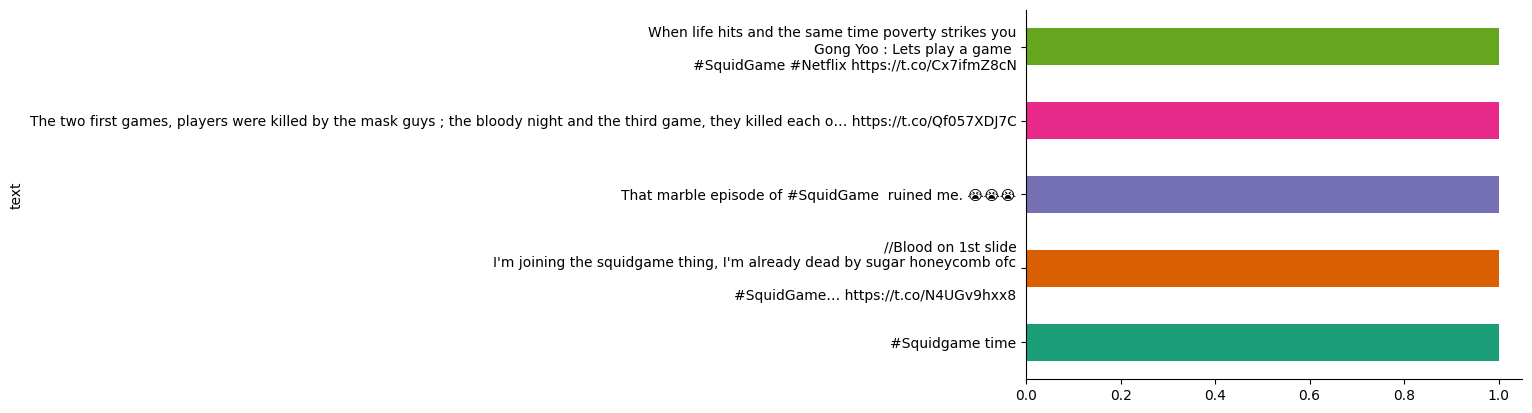

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

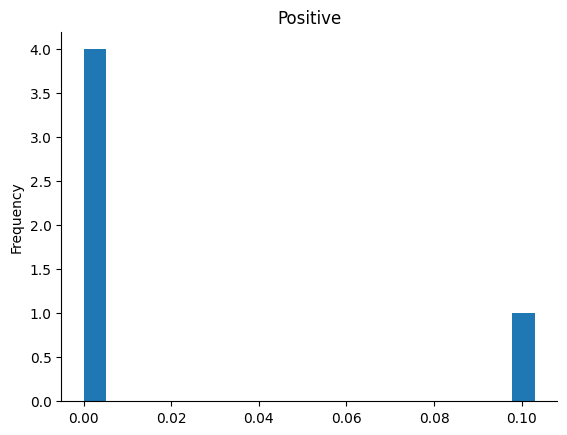

In [ ]:
from matplotlib import pyplot as plt
_df_0['Positive'].plot(kind='hist', bins=20, title='Positive')
plt.gca().spines[['top', 'right',]].set_visible(False)

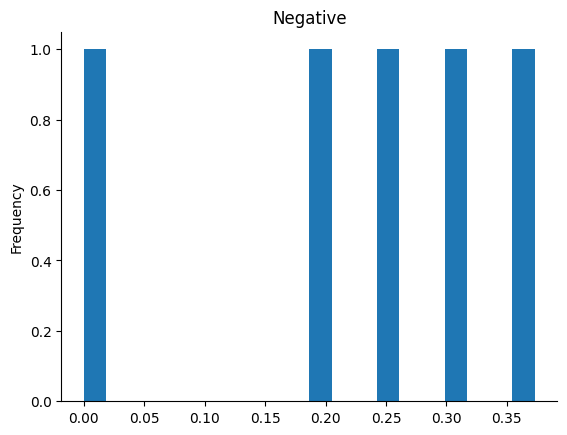

In [ ]:
from matplotlib import pyplot as plt
_df_1['Negative'].plot(kind='hist', bins=20, title='Negative')
plt.gca().spines[['top', 'right',]].set_visible(False)